In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Classification\Customer Churn Prediction.xlsx")

In [3]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
716,0114-IGABW,Female,0,Yes,No,71,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),58.25,4145.90,No
3835,8194-PEEBY,Female,0,Yes,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,533.50,No
2614,3351-NQLDI,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop(columns=['customerID'], axis=1, inplace=True)

In [6]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(7021, 20)

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [10]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

ct = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', dtype=np.int32), [0,2,3,5,6,7,8,9,10,11,12,13,14,15,16]),
    ('ft', FunctionTransformer(np.log1p, validate=True), [1,4,17,18]),
], remainder='passthrough', verbose_feature_names_out=False)

In [13]:
ct.fit(x)
x_encoded = ct.transform(x)

# Get only feature names from the OHE part (the rest we can assign manually)
ohe_feature_names = ct.named_transformers_['ohe'].get_feature_names_out(input_features=x.columns[[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16]])

# Combine names
other_features = list(x.columns[[1,4,17,18]]) + [col for i, col in enumerate(x.columns) if i not in [0,2,3,5,6,7,8,9,10,11,12,13,14,15,16,1,4,17,18]]
final_feature_names = list(ohe_feature_names) + other_features

x_en = pd.DataFrame(x_encoded, columns=final_feature_names)

In [14]:
x_en.describe()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,...,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.484546,0.300527,0.902863,0.097137,0.423159,0.440108,0.215354,0.215354,0.287566,...,0.209799,0.241419,0.592651,0.216778,0.335992,0.227318,0.112645,3.044217,4.045198,6.955564
std,0.500017,0.499797,0.458520,0.296166,0.296166,0.494095,0.496435,0.411097,0.411097,0.452660,...,0.407194,0.427974,0.491376,0.412080,0.472370,0.419130,0.255734,1.149834,0.579459,1.535233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.957511,2.985682
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,3.604138,6.021387
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.401197,4.268298,7.252231
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.025352,4.509760,8.243467
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147,4.290459,4.785406,9.069445


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y_en = le.transform(y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_en, y_en, test_size=0.2, random_state=42)

## Logistic Regression Algorithm

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 79.29
Training Accuracy: 81.02


In [20]:
lrc = LogisticRegressionCV()
lrc.fit(x_train, y_train)

LogisticRegressionCV()

In [21]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 79.29
Training Accuracy: 81.02


In [22]:
x.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2710,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.4,482.8


In [23]:
new_data = [['Male', 1, 'No', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic',
             'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month',
             'Yes', 'Electronic check', 104.1, 3121.1]]

In [24]:
data = ct.transform(new_data)

In [25]:
val = lr.predict(data)

if val == 0: print('No')
else : print('Yes')

No


In [26]:
val = lrc.predict(data)

if val == 0: print('No')
else : print('Yes')

No


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr.predict(x_test))
print(cm)

[[938 115]
 [176 176]]


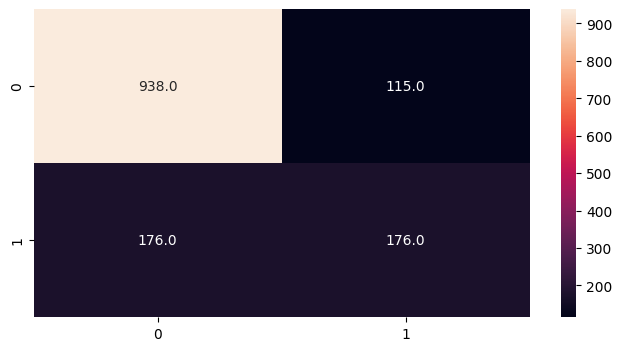

In [28]:
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='.1f' )
plt.show()

In [29]:
df['Churn'].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

## Naive Bayes Algorithm

<Figure size 800x900 with 0 Axes>

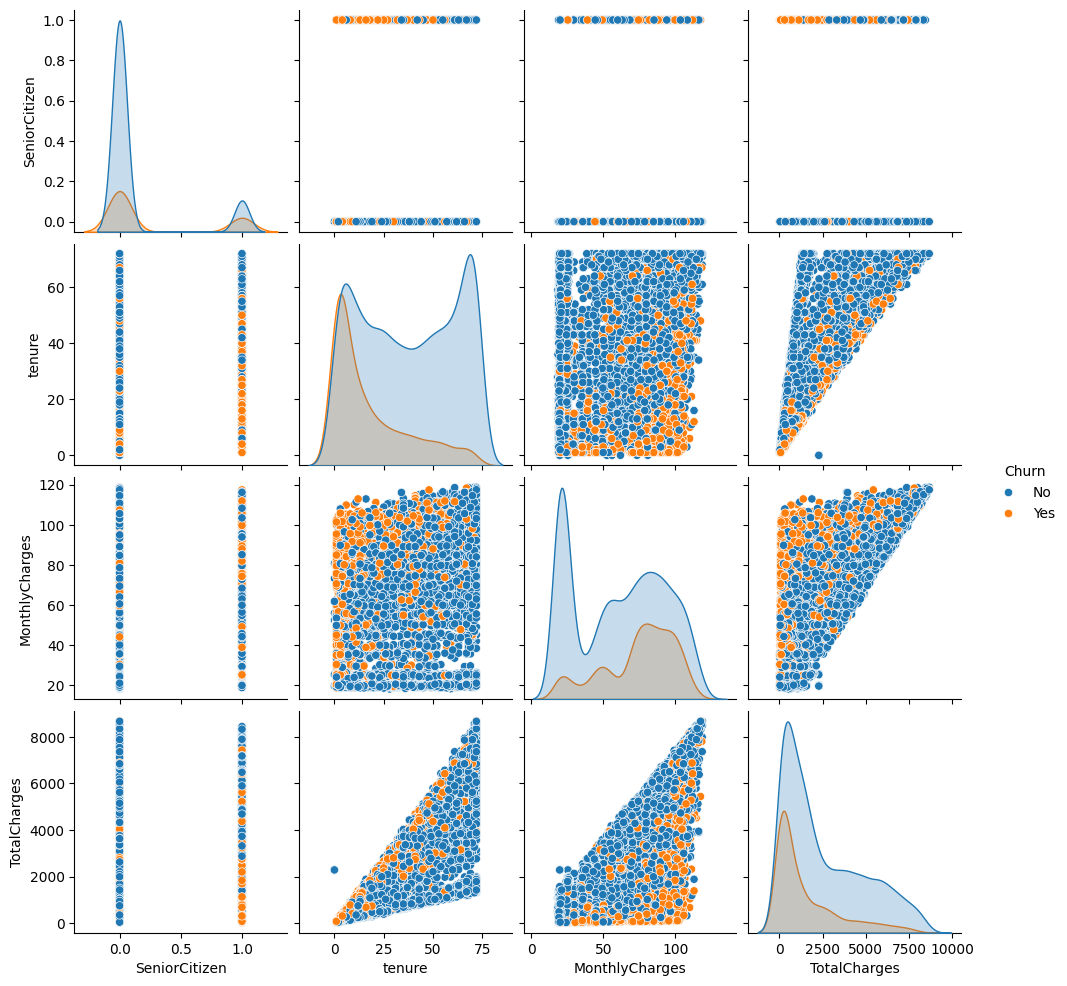

In [30]:
plt.figure(figsize=(8,9))
sns.pairplot(data=df, hue='Churn')
plt.show()

In [31]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

bn = BernoulliNB()
bn.fit(x_train, y_train)

BernoulliNB()

In [32]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 79.29
Training Accuracy: 81.02


In [33]:
print(confusion_matrix(y_test, bn.predict(x_test)))

[[709 344]
 [ 69 283]]


## Decision Tree Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 79.29
Training Accuracy: 81.02


In [36]:
print(confusion_matrix(y_test, dt.predict(x_test)))

[[846 207]
 [174 178]]


In [37]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

In [38]:
print(f"Testing Accuracy: {round(dt.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(dt.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 78.72
Training Accuracy: 79.95


In [39]:
for i in range(1,11):
    d = DecisionTreeClassifier(max_depth=i)
    d.fit(x_train, y_train)
    print(round(d.score(x_train, y_train)*100, 2), round(d.score(x_test, y_test)*100,  2), i)

73.2 74.95 1
78.95 79.57 2
78.95 79.57 3
79.52 78.93 4
79.95 78.79 5
80.31 78.72 6
82.0 79.07 7
83.3 78.01 8
85.2 76.94 9
87.2 75.66 10


## K Nearest Neighbour Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)

In [41]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [42]:
print(f"Testing Accuracy: {round(knn.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(knn.score(x_train, y_train)*100, 2)}")

  File "C:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\sub

Testing Accuracy: 78.65
Training Accuracy: 81.82


In [43]:
for i in range(1,6):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train, y_train)
    print(i, round(k.score(x_train, y_train)*100, 2), round(k.score(x_test, y_test)*100,  2))

1 99.73 73.88
2 86.7 75.73
3 86.29 74.95
4 84.69 76.73
5 83.9 76.65


## Support Vector Machine Algorithm

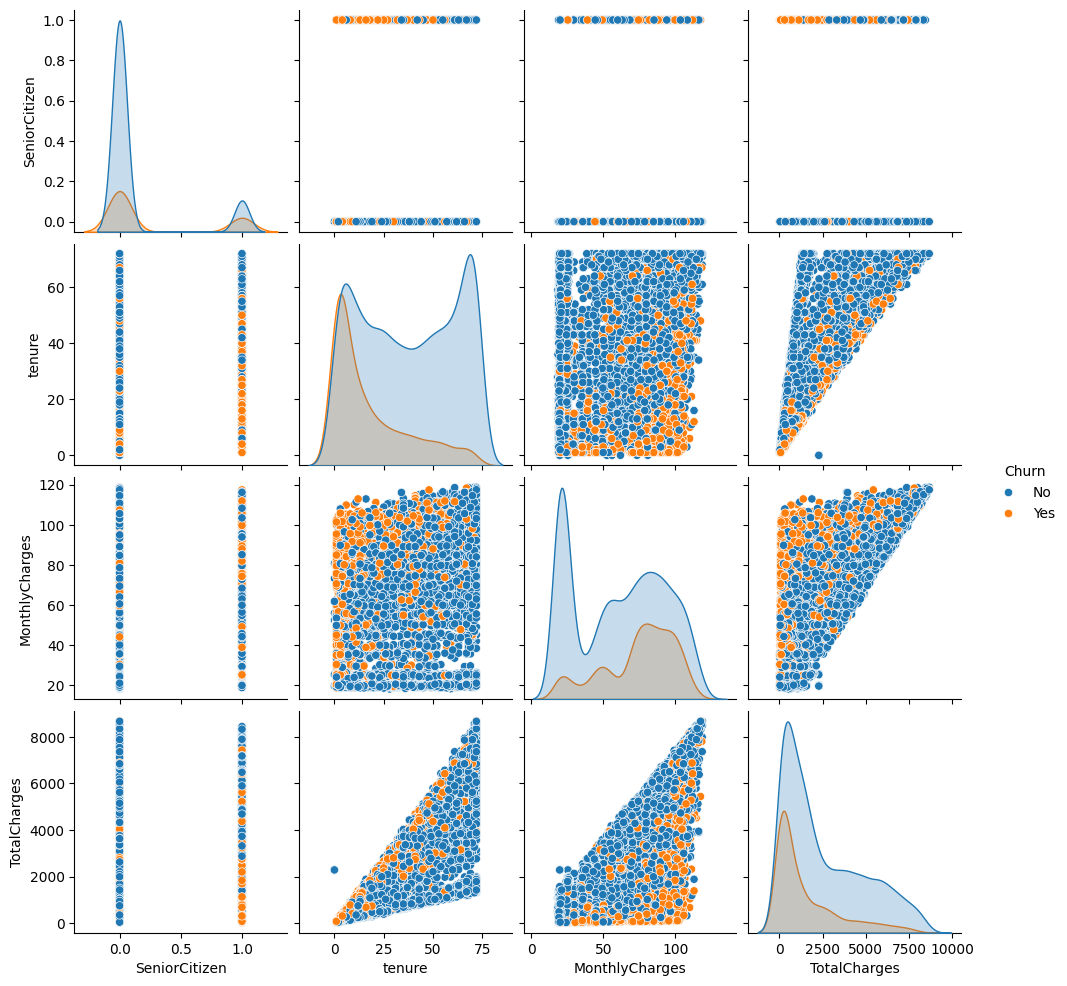

In [44]:
sns.pairplot(data=df, hue='Churn')
plt.show()

In [45]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [46]:
print(f"Testing Accuracy: {round(sv.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(sv.score(x_train, y_train)*100, 2)}")

Testing Accuracy: 78.79
Training Accuracy: 80.13


In [47]:
param_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [i for i in range(1, 11)]
}

In [48]:
# from sklearn.model_selection import GridSearchCV

# gd = GridSearchCV(sv, param_grid)
# gd.fit(x_train, y_train)

In [49]:
# print(grid.best_params_)
# print(round(grid.best_score_ * 100, 2))

## Voting Techniques

In [50]:
estimators = [('lr', lr), ('dt', dt), ('nb', bn), ('knn', knn)]

In [51]:
from sklearn.model_selection import cross_val_score

for est in estimators:
    x = cross_val_score(est[1], x_train, y_train, cv=500, scoring='accuracy')
    print(est[0] , np.round(np.mean(x), 2))

lr 0.81
dt 0.78
nb 0.71
knn 0.8


In [52]:
x_train.shape

(5616, 30)

## Hard Voting Algorithm

In [53]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators)
x = cross_val_score(vc, x_train, y_train, cv=500, scoring='accuracy')

In [54]:
print(np.round(np.mean(x), 2) *100)

80.0


## Soft Voting Algorithm

In [55]:
vc1 = VotingClassifier(estimators, voting='soft')
x = cross_val_score(vc1, x_train, y_train, cv=500, scoring='accuracy')
print(np.round(np.mean(x), 2) * 100)

79.0


In [56]:
x_train.shape

(5616, 30)

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [58]:
bc = BaggingClassifier(dt, n_estimators = 500, bootstrap=True)
bc.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   min_samples_split=3),
                  n_estimators=500)

In [59]:
print("Accuracy:", accuracy_score(y_test, bc.predict(x_test)) * 100)

Accuracy: 79.7153024911032


In [60]:
bc1 = BaggingClassifier(sv, n_estimators = 500, bootstrap=True)
bc1.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=500)

In [61]:
print("Accuracy:", accuracy_score(y_test, bc1.predict(x_test)) * 100)

Accuracy: 78.86120996441281


## Random Forest Algorithm

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                           max_depth=None,
                           random_state=42)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
print("Accuracy:", accuracy_score(y_test, rf.predict(x_test)) * 100)

Accuracy: 78.57651245551601
